In [1]:
import os, sys
my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from ensembler.potentials.OneD import fourWellPot, harmonicOscillator 
from ensembler.potentials.TwoD import harmonicOscillator as harmonicOscillator2D
from ensembler.potentials.TwoD import wavePotential, gaussPot2D

from ensembler.potentials.biasOneD import addedPotentials, metadynamicsPotential
from ensembler.potentials.biasTwoD import addedPotentials2D, metadynamicsPotential2D
from ensembler.integrator.stochastic import langevinIntegrator
from ensembler.integrator.newtonian import positionVerletIntegrator, velocityVerletIntegrator, leapFrogIntegrator
from ensembler.integrator.stochastic import monteCarloIntegrator, metropolisMonteCarloIntegrator, langevinIntegrator, langevinVelocityIntegrator
from ensembler.system import system

##Visualisation
from ensembler.visualisation.plotSimulations import static_sim_plots, static_sim_plots_bias

/Users/stlinker/Desktop/phD/Riniker/Github/Ensembler/examples/..


# Executing Simulations

## Original System

In [2]:
#Simple Langevin integration simulation:
#Thermostat is already included (Langevin thermostat)
#settings
sim_steps = 5000
x_min, x_max = (-10, 10)

#Simulation Setup
pot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
integrator = langevinIntegrator(dt=0.1, gamma=15)
sys=system(potential=pot, integrator=integrator,  position=2,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  5001

last_state:  State(position=7.096414106067645, temperature=3, totEnergy=1.9719150901660458, totPotEnergy=1.9719150901660458, totKinEnergy=nan, dhdpos=-1.2135989035647208, velocity=None)
5001


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0  2.000000          3.0   8.359462      8.359103      0.000358  1.039056   
1  2.138950          3.0   8.438228      8.438228           NaN -1.039056   
2  2.166124          3.0   8.432522      8.432522           NaN  0.052763   
3  2.253550          3.0   8.348088      8.348088           NaN  0.372699   
4  2.060063          3.0   8.411551      8.411551           NaN  1.606024   

   velocity  
0  0.026776  
1       NaN  
2       NaN  
3       NaN  
4       NaN

{'bodies': [<matplotlib.collections.PolyCollection object at 0x12025bda0>]}


(None, <Figure size 1152x288 with 3 Axes>)

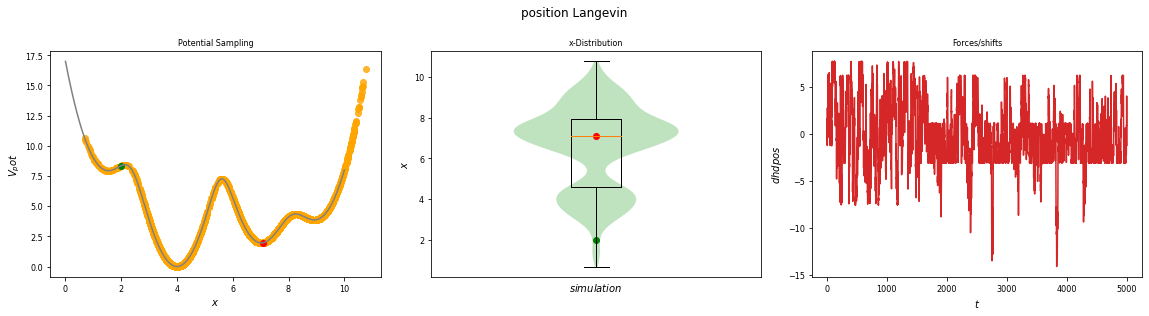

In [3]:
#plot
static_sim_plots(sys, title="position Langevin", x_range=list(range(0,10)))

# Enhaced sampling

# Time independent bias

## Umbrella sampling

In [4]:
sim_steps = 1000
x_min, x_max = (-10, 10)

#Simulation Setup
origpot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
biaspot = harmonicOscillator(k=10, x_shift=5) 
#Add the bias and the original system
totpot = addedPotentials(origpot, biaspot)

integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=5,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()


initializing Langevin old Positions	 



Trajectory length:  1001

last_state:  State(position=3.8580980306055133, temperature=3, totEnergy=6.597993508600748, totPotEnergy=6.597993508600748, totKinEnergy=nan, dhdpos=10.08499046325553, velocity=None)
1001


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0  5.000000          3.0   3.883243      3.880991      0.002252  7.296538   
1  4.952145          3.0   3.548134      3.548134           NaN -7.296538   
2  4.784549          3.0   2.661122      2.661122           NaN -6.606856   
3  4.724840          3.0   2.457002      2.457002           NaN -3.924667   
4  4.845612          3.0   2.931851      2.931851           NaN -2.909013   

   velocity  
0 -0.067111  
1       NaN  
2       NaN  
3       NaN  
4       NaN

{'bodies': [<matplotlib.collections.PolyCollection object at 0x10d3423c8>]}


(None, <Figure size 1152x288 with 3 Axes>)

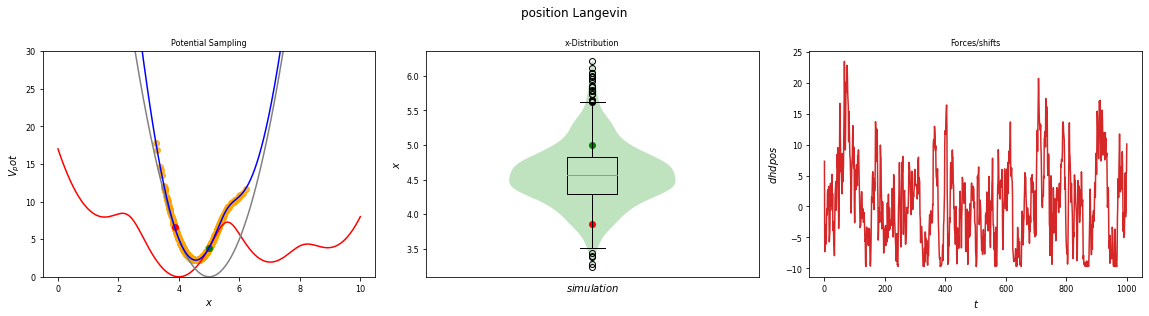

In [5]:
#plot
static_sim_plots_bias(sys, title="position Langevin", x_range=list(range(0,10)), y_range=[0,30])

## Scaled potential

In [6]:
sim_steps = 5000
x_min, x_max = (-10, 10)

#Simulation Setup
origpot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
biaspot = fourWellPot(Vmax=-2.5, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
#Add the bias and the original system
totpot = addedPotentials(origpot, biaspot)

integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=5,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  5001

last_state:  State(position=5.11464041231316, temperature=3, totEnergy=1.7761231398109305, totPotEnergy=1.7761231398109305, totKinEnergy=nan, dhdpos=-2.8281335987711738, velocity=None)
5001


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0  5.000000          3.0   1.457007      1.455372      0.001636  2.736202   
1  4.995591          3.0   1.443322      1.443322           NaN -2.736202   
2  5.492501          3.0   2.655333      2.655333           NaN -2.729665   
3  5.510559          3.0   2.674961      2.674961           NaN -1.174151   
4  5.700892          3.0   2.679341      2.679341           NaN -0.998684   

   velocity  
0  0.057197  
1       NaN  
2       NaN  
3       NaN  
4       NaN

{'bodies': [<matplotlib.collections.PolyCollection object at 0x120aa17f0>]}


(None, <Figure size 1152x288 with 3 Axes>)

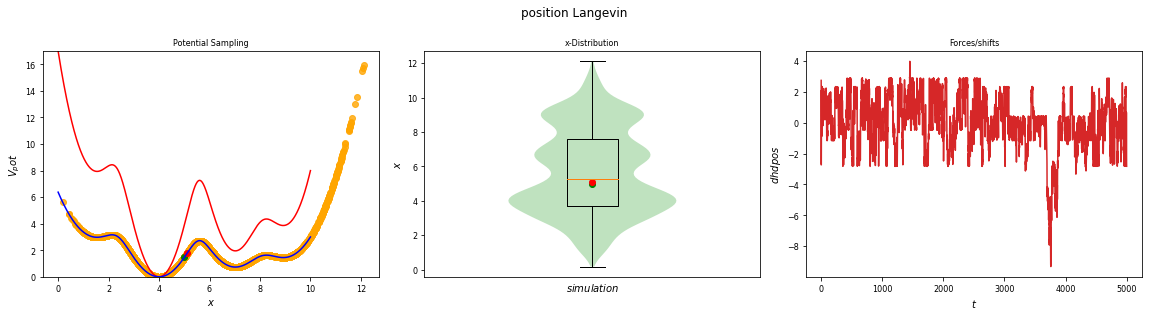

In [7]:
#plot
static_sim_plots_bias(sys, title="position Langevin", x_range=list(range(0,10)), y_range=[0,17])

# Time dependent bias

## Metadynamics / Local elevation

In [9]:

sim_steps = 200
x_min, x_max = (-10, 10)

#Simulation Setup
origpot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

# mu will be overwritten during the matadyanamics simulation
#biaspot = gaussPot(A=.1, mu=4, sigma=0.5)
#Add the bias and the original system
totpot = metadynamicsPotential(origpot, amplitude=.5, sigma=0.2, n_trigger=5, bias_grid_min=0, bias_grid_max=10, numbins=1000)


# currentrly does not work with MonteCarloIntegrators
#integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=5) 
integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=4,  temperature=.3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()


initializing Langevin old Positions	 



Trajectory length:  201

last_state:  State(position=2.4907185324603156, temperature=0.3, totEnergy=8.022872741644061, totPotEnergy=8.022872741644061, totKinEnergy=nan, dhdpos=1.2917727608430285, velocity=None)
201


position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0  4.000000          0.3  -0.001327     -0.001344      0.000017  0.003428   
1  3.989563          0.3  -0.000946     -0.000946           NaN -0.003428   
2  3.902565          0.3   0.036107      0.036107           NaN  0.079680   
3  3.889660          0.3   0.046731      0.046731           NaN  0.771982   
4  3.829546          0.3   0.113661      0.113661           NaN  0.874579   

   velocity  
0 -0.005842  
1       NaN  
2       NaN  
3       NaN  
4       NaN

{'bodies': [<matplotlib.collections.PolyCollection object at 0x121f48208>]}


(None, <Figure size 1152x288 with 3 Axes>)

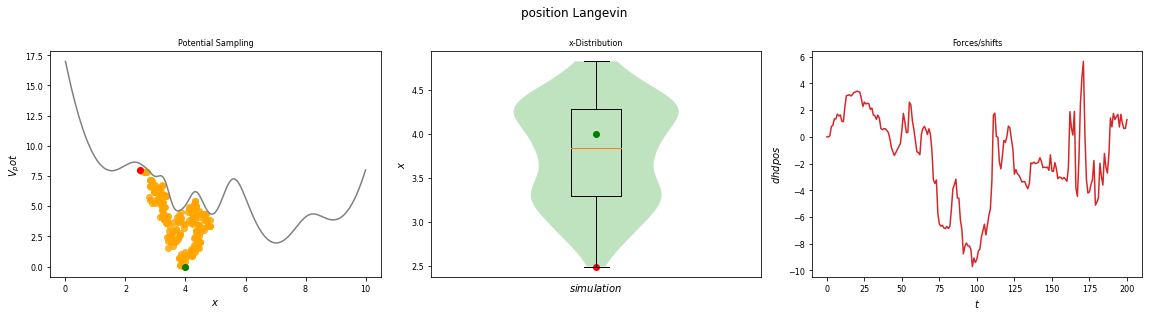

In [10]:
#plot
static_sim_plots(sys, title="position Langevin", x_range=list(range(0,10)))

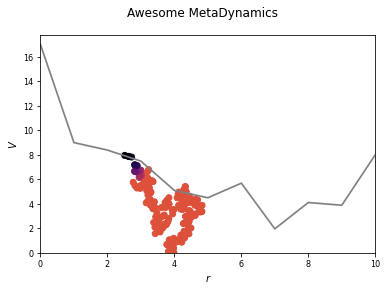

In [11]:
%matplotlib inline
import tempfile
from IPython.display import HTML
from ensembler.visualisation.animationSimulation import animation_trajectory, animation_EDS_trajectory
#plot simulation
ani, out_path = animation_trajectory(sys, x_range=list([0,10]), title="Awesome MetaDynamics",)

##put it into jupyter:

os.chdir(tempfile.gettempdir())
x = ani.to_jshtml()
HTML(x)

# 2D systems

## Umbrella Sampling

In [12]:
sim_steps = 1000
#x_min, x_max = (-10, 10)

#Simulation Setup
origpot = wavePotential(multiplicity=[2,2])
biaspot = harmonicOscillator2D(k=np.array([10,10]), r_shift=np.array([10,5])) 

#Add the bias and the original system
totpot = addedPotentials2D(origpot, biaspot)

integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=np.array([20,70]),  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  1001

last_state:  State(position=array([10.17472507,  4.72122778]), temperature=3, totEnergy=array(-0.38778704), totPotEnergy=array(-0.38778704), totKinEnergy=nan, dhdpos=array([-3.69484836, -0.87032638]), velocity=None)
1001


position temperature           totEnergy  \
0                                 [20, 70]           3             21624.1   
1   [19.70437811482279, 66.32109918734692]           3   19272.89025546279   
2  [18.837966012524408, 62.06126328540881]           3  16671.516398610926   
3  [18.127058890966197, 58.42689034569715]           3  14601.717103306732   
4   [17.56272060286689, 54.86563745655243]           3    12717.0647761534   

         totPotEnergy  totKinEnergy                                    dhdpos  \
0  21624.135248364342      0.002227     [98.5097736790413, 648.0395206811194]   
1   19272.89025546279           NaN   [-98.5097736790413, -648.0395206811194]   
2  16671.516398610926           NaN  [-95.06302897920256, -611.9297495866304]   
3  14601.717103306732           NaN  [-88.42601560987697, -572.6117557660839]   
4    12717.0647761534           NaN  [-83.25478356102178, -535.4225795548281]   

                                    velocity  
0  [0.0462409913681887, 0.04812490418646563]  
1                                       None  
2                                       None  
3                                       None  
4                                       None

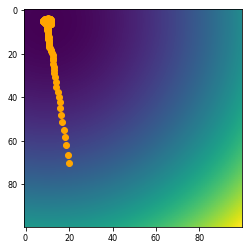

In [13]:
test_timing_with_points=100
positions = np.linspace(0, 100, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

traj_pos = np.array(list(map(lambda x: np.array(x), sys.trajectory.position))).T

plt.imshow(totpot.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))
plt.scatter(*traj_pos, color="orange")

## Scaled potential

In [14]:
sim_steps = 2000

#Simulation Setup
origpot = wavePotential(amplitude=(100,100), multiplicity=[1/5.,1/5.])
biaspot = wavePotential(amplitude=(-70,-70), multiplicity=[1/5.,1/5.]) 

#Add the bias and the original system
totpot = addedPotentials2D(origpot, biaspot)

integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=np.array([50,50]),  temperature=20)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  2001

last_state:  State(position=array([18.13660377, 50.03252278]), temperature=20, totEnergy=array(-51.59551367), totPotEnergy=array(-51.59551367), totKinEnergy=nan, dhdpos=array([-2.25736865, -3.45965791]), velocity=None)
2001


position temperature           totEnergy  \
0                                 [50, 50]          20            -50.0503   
1   [49.76079375609846, 50.60759294859026]          20  -48.93198217854409   
2  [50.12753667050706, 50.983241905411845]          20  -46.24592728005189   
3  [49.336457482200565, 51.10630135856596]          20  -48.08712064523249   
4  [49.483489339560414, 51.58266345529103]          20   -45.5623395862015   

         totPotEnergy  totKinEnergy  \
0  -50.34429174458714      0.293976   
1  -48.93198217854409           NaN   
2  -46.24592728005189           NaN   
3  -48.08712064523249           NaN   
4   -45.5623395862015           NaN   

                                      dhdpos  \
0       [3.26412666533622, 3.26412666533622]   
1     [-3.26412666533622, -3.26412666533622]   
2  [-3.0196304233580973, -3.850328191484138]   
3   [-3.391465805630207, -4.184860889035425]   
4  [-2.5692734564248676, -4.289405160363897]   

                                      velocity  
0  [-0.34307492907394194, -0.6857487721818886]  
1                                         None  
2                                         None  
3                                         None  
4                                         None

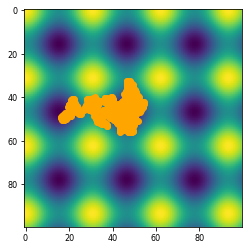

In [15]:
test_timing_with_points=100
positions = np.linspace(0, 100, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

traj_pos = np.array(list(map(lambda x: np.array(x), sys.trajectory.position))).T

plt.imshow(totpot.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))
plt.scatter(*traj_pos, color="orange")

## Metadynamics / Local elevation

In [16]:
sim_steps = 2000

#Simulation Setup
origpot = wavePotential(amplitude=(10,10), multiplicity=[1/6.,1/6.], degree=False)

# mu will be overwritten during the matadyanamics simulation
#Add the bias and the original system
totpot = metadynamicsPotential2D(origpot, amplitude=1, sigma=(5,5), n_trigger=10, bias_grid_min=(0,0), bias_grid_max=(100,100), numbins=(1000,1000))

# currentrly does not work with MonteCarloIntegrators
#integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=5) 
integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=np.array([60,60]),  temperature=1)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  2001

last_state:  State(position=array([63.34543378, 18.45244094]), temperature=1, totEnergy=array(15.62520207), totPotEnergy=array(15.62520207), totKinEnergy=nan, dhdpos=array([-0.58697691, -2.89024581]), velocity=None)
2001


position temperature            totEnergy  \
0                                 [60, 60]           1             -16.7763   
1   [60.00108167142822, 59.94617098370136]           1  -16.828918232616104   
2  [60.06416425229021, 59.916271316433495]           1  -16.797871571883455   
3   [60.05521938415658, 59.97648120756422]           1    -16.7522684456532   
4   [60.02235887824714, 60.00387385421237]           1  -16.757585353350734   

          totPotEnergy  totKinEnergy  \
0  -16.781430581528834      0.005113   
1  -16.828918232616104           NaN   
2  -16.797871571883455           NaN   
3    -16.7522684456532           NaN   
4  -16.757585353350734           NaN   

                                       dhdpos  \
0    [0.9067018514823122, 0.9067018514823122]   
1  [-0.9067018514823122, -0.9067018514823122]   
2  [-0.9069539477744406, -0.8941193099458401]   
3  [-0.9216048309219496, -0.8870991041038532]   
4   [-0.9195335529097552, -0.901213247335885]   

                                      velocity  
0  [0.08279654107050546, -0.05805176884827171]  
1                                         None  
2                                         None  
3                                         None  
4                                         None

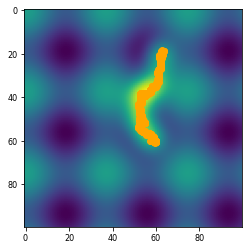

In [17]:
test_timing_with_points=100
positions = np.linspace(0, 100, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

traj_pos = np.array(list(map(lambda x: np.array(x), sys.trajectory.position))).T


energies_test = np.array([totpot.ene(entry) for entry in positions2D])

plt.imshow(energies_test.reshape([test_timing_with_points,test_timing_with_points]))
plt.scatter(*traj_pos, color="orange")

### Same simulation without metadynamics

In [18]:
sim_steps = 2000

#Simulation Setup
origpot = wavePotential(amplitude=(10,10), multiplicity=[1/6.,1/6.], degree=False)

# currentrly does not work with MonteCarloIntegrators
#integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=5) 
integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=origpot, integrator=integrator,  position=np.array([60,60]),  temperature=1)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  2001

last_state:  State(position=array([59.46384603, 55.12206704]), temperature=1, totEnergy=array(-18.56138654), totPotEnergy=array(-18.56138654), totKinEnergy=nan, dhdpos=array([-0.81944761,  0.35807646]), velocity=None)
2001


position temperature            totEnergy  \
0                                 [60, 60]           1             -16.7612   
1  [60.13736998422675, 59.897752578042144]           1  -16.746173934938078   
2  [60.00296029703988, 60.116532949707185]           1  -16.671508931035618   
3   [59.95378590549394, 60.13503953925134]           1   -16.69852836100607   
4   [60.04961765604742, 60.25240394781373]           1  -16.499944875303093   

          totPotEnergy  totKinEnergy  \
0  -16.781430581528834      0.020268   
1  -16.746173934938078           NaN   
2  -16.671508931035618           NaN   
3   -16.69852836100607           NaN   
4  -16.499944875303093           NaN   

                                       dhdpos  \
0    [0.9067018514823122, 0.9067018514823122]   
1  [-0.9067018514823122, -0.9067018514823122]   
2  [-0.9384789942919209, -0.8827399919900437]   
3  [-0.9073917135865702, -0.9336901028872512]   
4  [-0.8959036928336017, -0.9379439586387041]   

                                    velocity  
0  [-0.0614829918426409, 0.1917192371973621]  
1                                       None  
2                                       None  
3                                       None  
4                                       None

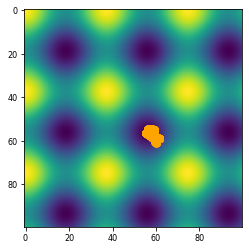

In [19]:
test_timing_with_points=100
positions = np.linspace(0, 100, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

traj_pos = np.array(list(map(lambda x: np.array(x), sys.trajectory.position))).T


energies_test = np.array([origpot.ene(entry) for entry in positions2D])

plt.imshow(energies_test.reshape([test_timing_with_points,test_timing_with_points]))
plt.scatter(*traj_pos, color="orange")